# Data Visualization
Visualize the lidar, joystick, and 10m goal data

In [1]:
from dataset import CLIPDataModule
from termcolor import cprint
import pandas as pd
import time
import psutil
import matplotlib.pyplot as plt
from lidar_helper import get_affine_matrix_quat
%matplotlib inline

/home/abhinavchadaga/CS/clip_social_nav/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create CLIPDataModule

In [2]:
dm = CLIPDataModule(data_path='../data/',
                    batch_size=32,
                    num_workers=4,
                    joy_len=300,
                    include_lidar_file_names=True,
                    verbose=True)

dm.setup()

loading data from ../data/...
skip first 50 frames
batch size: 32
future joystick length: 300

creating training set...


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


creating validation set...


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

training size: 3481 samples
validation size: 837 samples


In [3]:
cprint(f"number of samples: {len(dm.training_set) + len(dm.validation_set)}",
       'green',
       attrs=['bold'])


number of samples: 4318


## Test Training DataLoader
Check if all batches can be retrieved successfully

### Shape Information:
```lidar_stack.shape``` = (batch size, channels, img height, img width) \
```joystick.shape``` = (batch size, joy_len, 3) \
```goal.shape``` = (batch size, 2)


In [4]:
# turn train_dataloader into iterable
trainloader = dm.train_dataloader()
train_iter = iter(trainloader)
print(f'number of batches: {len(trainloader)}')

number of batches: 108


In [5]:
%%time
for i, batch in enumerate(trainloader):
    lidar, joystick, goal = batch
    lidar_stack = lidar[0]
    lidar_fnames = lidar[1]
    if i == 1:
        print('lidar img batch shape: ', lidar_stack.shape)
        print('lidar file names batch shape: ', lidar_fnames.shape)
        print('joystick batch shape: ', joystick.shape)
        print('goal batch shape: ', goal.shape)

cprint(f'successfully retrieved all batches !!!', color='green', attrs=['bold'])

lidar img batch shape:  torch.Size([32, 5, 401, 401])
lidar file names batch shape:  torch.Size([32, 5])
joystick batch shape:  torch.Size([32, 300, 3])
goal batch shape:  torch.Size([32, 2])
successfully retrieved all batches !!!
CPU times: user 96.7 ms, sys: 756 ms, total: 853 ms
Wall time: 17 s


## Select Random Sample from Training Data

In [11]:
import random

# idx = random.randint(0, len(dm.validation_set))
idx = 10


# get random sample
sample = dm.training_set[idx]
idx

10

## Visualize Lidar Stack 

index: 10, total offset: 50


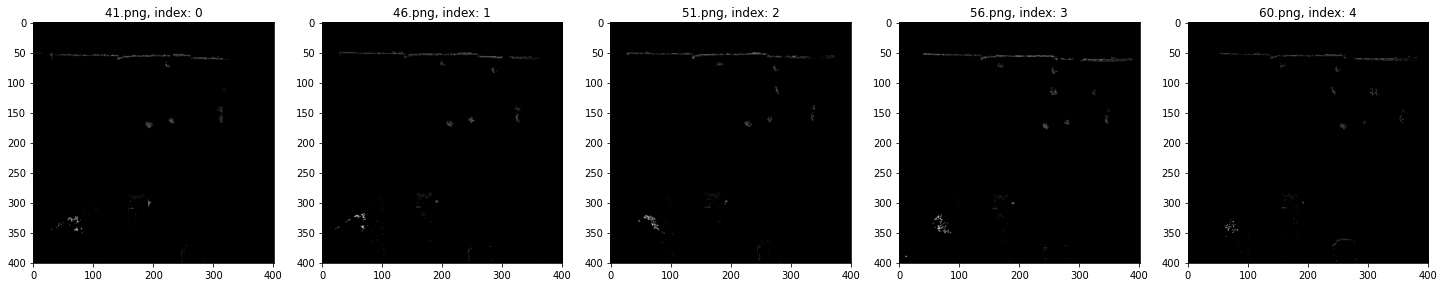

In [12]:
from lidar_helper import visualize_lidar_stack

# visualize mode returns lidar stack
# and the corresponding file names
lidar_stack = sample[0][0]
lidar_fnames = sample[0][1]

cprint(f'index: {idx}, total offset: 50', color='green', attrs=['bold'])
visualize_lidar_stack(lidar_stack=lidar_stack, file_names=lidar_fnames)

## Visualize Joystick Data

In table format

In [13]:
joystick = sample[1]
print('joystick dtype: ', joystick.dtype)
print('joystick shape: ', joystick.shape)

joy_df = pd.DataFrame(data=joystick,
                      columns=['linear_x', 'linear_y', 'angular_z'])
joy_df

joystick dtype:  float32
joystick shape:  (300, 3)


,linear_x,linear_y,angular_z
0,1.6,0.0,-0.0
1,1.6,0.0,-0.0
2,1.6,0.0,-0.0
3,1.6,0.0,-0.0
4,1.6,0.0,-0.0
...,...,...,...
295,1.6,0.0,-0.0
296,1.6,0.0,-0.0
297,1.6,0.0,-0.0
298,1.6,0.0,-0.0


## Goal Information
(x, y) location relative to the current position of the robot

In [14]:
goal = sample[2]
print(f'x: {goal[0]:.2f}, y: {goal[1]:.2f}')

x: -9.16, y: -3.61


In [10]:
# for sample in dm.validation_set:
#     # print the goal information at each time step
#     print(sample[2])